<a href="https://colab.research.google.com/github/jaquedebrito/Atividades_TrilhaParaElas_FaseMentoria/blob/main/Copy_of_Encontro_2_TrilhaParaElasIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instala Bibliotecas

In [1]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install -U datasets

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [datasets]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 

# Importa Bibliotecas

In [3]:
#Importa biblioteca para carregar datasets do Hugging face
from datasets import load_dataset
#Importa biblioteca para geração de gráficos
import matplotlib.pyplot as plt
#Importa a biblioteca do pandas
import pandas as pd

# 1. Conhecendo dataset

In [4]:
#Carrega dataset do Hugging face
ds = load_dataset("ruanchaves/b2w-reviews01")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.64k [00:00<?, ?B/s]

b2w-reviews01.py:   0%|          | 0.00/2.99k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/30.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/132373 [00:00<?, ? examples/s]

In [5]:
#Visualiza estrutura do Dataset
ds

DatasetDict({
    train: Dataset({
        features: ['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2', 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text', 'reviewer_birth_year', 'reviewer_gender', 'reviewer_state'],
        num_rows: 132373
    })
})

In [6]:
# Converter para DataFrame
df = pd.DataFrame(ds['train'])
#Dimensões do dataset (quantidade de registros e variáveis)
df.shape

(132373, 14)

In [7]:
#Visualiza as primeiras linhas do dataframe
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [8]:
#Visualiza as ultimas linhas do dataframe
df.tail()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,None,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,None,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,None,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ
132372,2018-05-31 23:50:33,ea9467aa73271fb4f68c04f4dd4f4eef304d6ee85441fb...,114081902,Painel de Fotos Bee Colection Rue Bac (74x94x3...,kapos,Decoração,Painel de Fotos,Produto não entregue,1,No,"Comprei esse produto, quando chegou estava com...",1982.0,F,ES


In [9]:
#Visualiza as primeiras e últimas linhas do dataframe
display(df)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,None,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,None,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,None,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


In [10]:
#Visualiza as colunas do dataframe
df.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

# 2. Distribuição das avaliações

In [11]:
tab_aval = df['overall_rating'].value_counts().sort_index()
tab_aval

,count
overall_rating,
1,27369
2,8389
3,16315
4,32345
5,47955


Text(0, 0.5, 'Quantidade de Avaliações')

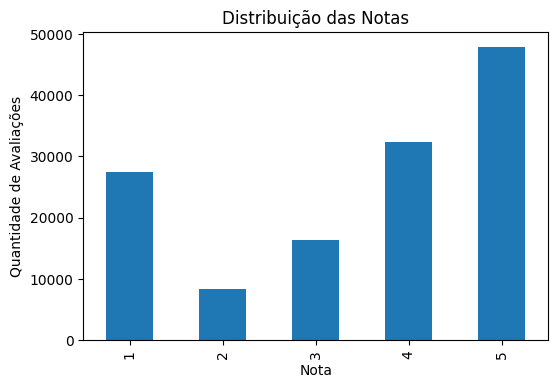

In [12]:
#Configurar tamanho do gráfico
plt.figure(figsize=(6, 4))
df['overall_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Quantidade de Avaliações')

# 3. Distribuição proporcional das avaliações

Text(0, 0.5, '')

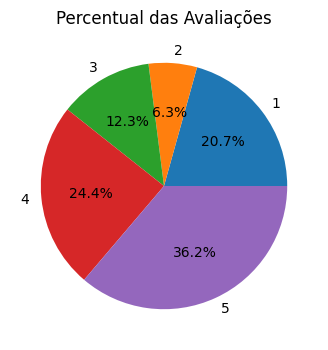

In [13]:
#Gera gráfico de pizza. Autopct: é uma string ou função usada para rotular as partes do gráfico com seus valores numéricos
plt.figure(figsize=(6, 4))
df['overall_rating'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual das Avaliações')
plt.ylabel('')

# 4. Proporção de Recomendação

In [14]:
# Contar recomendações para amigo
recommend_counts = df['recommend_to_a_friend'].value_counts()
recommend_counts

,count
recommend_to_a_friend,
Yes,96368
No,35987


Text(0, 0.5, '')

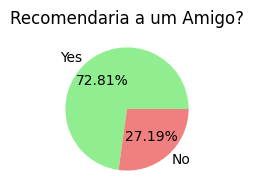

In [15]:
plt.figure(figsize=(4, 2))
recommend_counts.plot(kind='pie', autopct='%1.2f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Recomendaria a um Amigo?')
plt.ylabel('')

# 5. Distribuição por Estado

In [16]:
count_estado = df['reviewer_state'].value_counts().head(10)
count_estado

,count
reviewer_state,
SP,49207
RJ,17580
MG,16322
PR,6745
RS,6622
BA,4806
SC,4478
ES,3052
PE,2955


Text(0, 0.5, 'Quantidade de Avaliações')

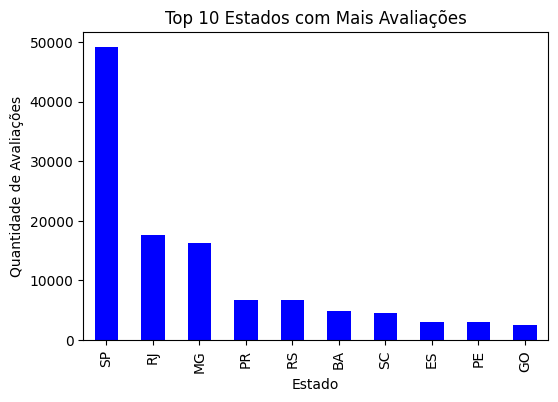

In [17]:
plt.figure(figsize=(6, 4))
df['reviewer_state'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Estados com Mais Avaliações')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Avaliações')

# 6.Nuvem de Palavras

In [18]:
#Importa biblioteca
from wordcloud import WordCloud

In [19]:
#Extrai somente o texto de avaliações
texts = df['review_text']
texts

,review_text
0,Estou contente com a compra entrega rápida o ú...
1,"Por apenas R$1994.20,eu consegui comprar esse ..."
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4,"A entrega foi no prazo, as americanas estão de..."
...,...
132368,"Vale muito, estou usando no controle do Xbox e..."
132369,"Prático e barato, super indico o produto para ..."
132370,Chegou antes do prazo previsto e corresponde a...
132371,"Material fraco, poderia ser melhor. Ficou deve..."


In [20]:
#Concatena todos os campos textos em uma string, considerando campos Nulos
full_text = " ".join([str(text) if text is not None else "" for text in texts])

In [21]:
# Cria a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)

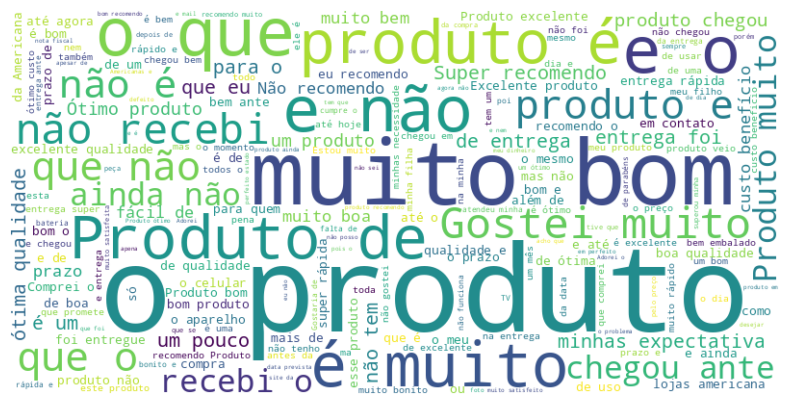

In [22]:
# Gera a imagem
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 7. Gere a nuvem de palavras desconsiderando stopwords

In [23]:
#Import a biblioteca Natural Language Tookit
import nltk
#Importa a biblioteca que contem as stopwords
from nltk.corpus import stopwords

In [24]:
# Baixe
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
# Pegue a lista de stopwords em português
stopwords_pt = set(stopwords.words('portuguese'))

In [26]:
print(sorted(stopwords_pt))

['a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estar', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéramos', 'estivéssemos', 'estou', 'está', 'estávamos', 'estão', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'forem', 'formos', 'fosse', 'fossem', 'fui', 'fôramos', 'fôssemos', 'haja', 'hajam', 'hajamos', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houvermos', 'houverá', 'houverão', 'houveríamos', 'houvesse', 'houvessem', 'houvéramos', 'houvéssemos', 'há', 'hão', 'isso', 'isto', 'já'

In [27]:
# Gera word cloud eliminando stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_pt).generate(full_text)

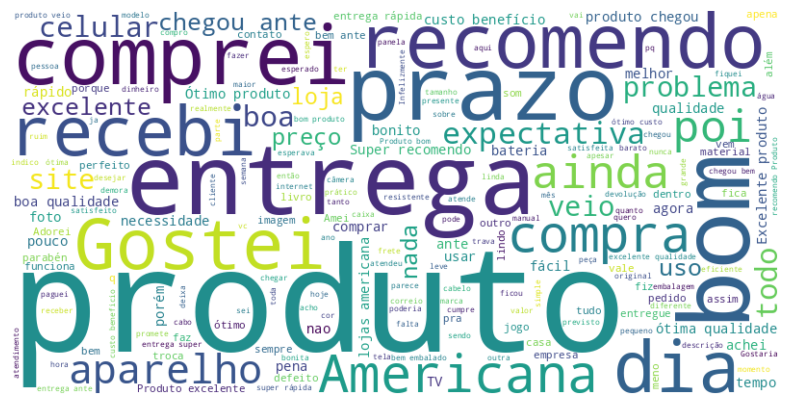

In [28]:
# Mostra a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 8. Gerar nuvem de palavras por nota da avaliação

In [29]:
#Cria um novo dataframe contendo apenas os registros com nota da avaliação igual a 1.
df_rate = df[df['overall_rating']==1]

In [30]:
#Extrai somente o campo do título das avaliações
texts_rate = df_rate['review_title']
texts_rate

,review_title
9,NÃO RECEBI O PRODUTO
13,Revoltado
25,Eu não recebi o produto????!!!!!!!
31,Não recebi ainda foi devolvido!
33,Péssimo produto e atendimento da lojas Americanas
...,...
132355,Produto avariado
132364,Não gostei do produto.
132365,Cancelei não pega Netflix
132371,O produto não é bom.


In [31]:
#Agrupa textos considerando campos nulos
full_text_rate = " ".join([str(text) if text is not None else "" for text in texts_rate])

In [32]:
# Gera wordcloud
wordcloud_1 = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_pt).generate(full_text_rate)

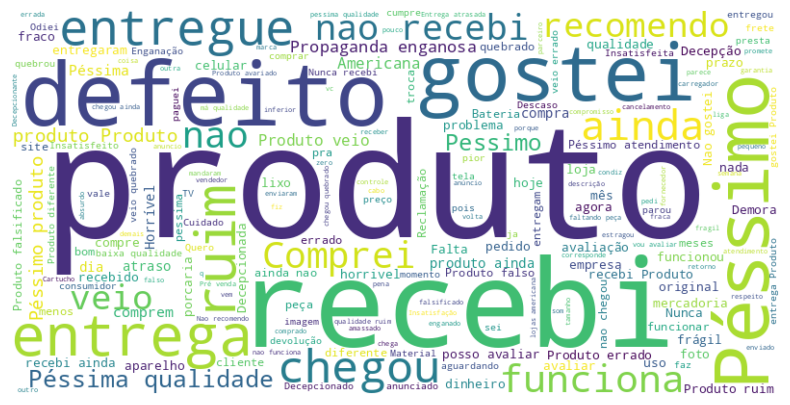

In [33]:
# Mostra a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.show()

# 9. Calcular a idade

In [34]:
#Converter as informações do submission_date que está string para datetime e gravar no campo "submission_data_1"
df['submission_date_1'] = pd.to_datetime(df['submission_date'],errors='coerce')
# Extrair o ano da submissão do novo campo e salvar no campo submission_year
df['submission_year'] = df['submission_date_1'].dt.year

In [35]:
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,submission_date_1,submission_year
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ,2018-01-01 00:11:28,2018
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC,2018-01-01 00:13:48,2018
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP,2018-01-01 00:26:02,2018
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP,2018-01-01 00:35:54,2018
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG,2018-01-01 01:00:28,2018


In [36]:
#Cria campo idade e calcula a idade de cada revisor
df['idade'] = df['submission_year'] - df['reviewer_birth_year']

In [37]:
#Visualiza dataframe
df.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,submission_date_1,submission_year,idade
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,None,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ,2018-01-01 00:11:28,2018,60.0
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC,2018-01-01 00:13:48,2018,22.0
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP,2018-01-01 00:26:02,2018,34.0
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP,2018-01-01 00:35:54,2018,33.0
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG,2018-01-01 01:00:28,2018,24.0
